# Auto MPG Data Set


"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes."

Importing the required libraries as shown below

Data Analysing

Data Visualization

Electronic design automation (EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [4]:
da=pd.read_csv('auto.csv')
da

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Dataset Description

mpg: continuous

cylinders: multi-valued discrete
    
displacement: continuous
    
horsepower: continuous
    
weight: continuous
    
acceleration: continuous
    
model year: multi-valued discrete
    
origin: multi-valued discrete
    
car name: string 

In [5]:
da.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
da.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [7]:
#droping the car name column because it doesn't help us in the data modeling

data=da.drop(['car name'],axis=1)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
#Finding the null values 

data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [7]:
#Finding the data types of the datset

data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [8]:
#dataset columns 

data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [9]:
# Finding the un-unique values in each and every column

data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
dtype: int64

In [10]:
#this is used to find the ? in the dataset 
data[data.isin(["?"]).any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


So there are 6 rows having ? marks in the dataset

In [11]:
# here we sre converting ? into a nan value

data=data.replace({'?':np.nan})

In [12]:
# droping the rows containing nan value
data=data.dropna()
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [13]:
#Getting the data types of the dataset
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [14]:
# Since the housepower column is object we are converting them into a float type

data['horsepower']=data['horsepower'].astype('float')

In [15]:
# data types after converting 
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [16]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Elploratory Data Analysis (EDA)

Univariate plot

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
30.7     1
31.9     1
44.0     1
28.8     1
27.4     1
Name: mpg, Length: 127, dtype: int64


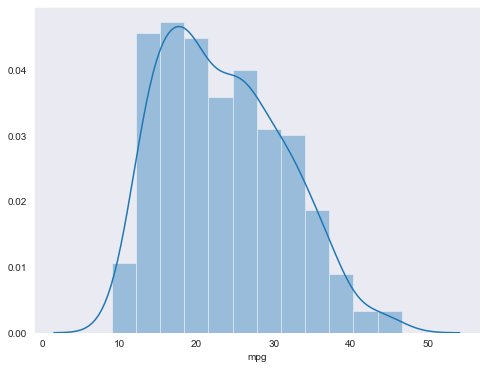

In [16]:
print(data['mpg'].value_counts())
plt.figure(figsize=(8,6))
sb.set_style('dark')
sb.distplot(data['mpg'])

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64


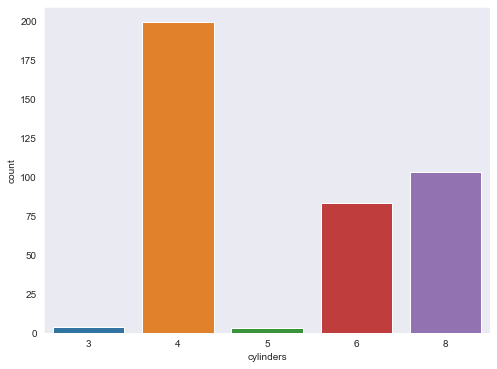

In [17]:
plt.figure(figsize=(8,6))
print(data['cylinders'].value_counts())
sb.countplot(data['cylinders'])                 

97.0     21
350.0    18
250.0    17
98.0     17
318.0    17
         ..
68.0      1
155.0     1
96.0      1
97.5      1
114.0     1
Name: displacement, Length: 81, dtype: int64


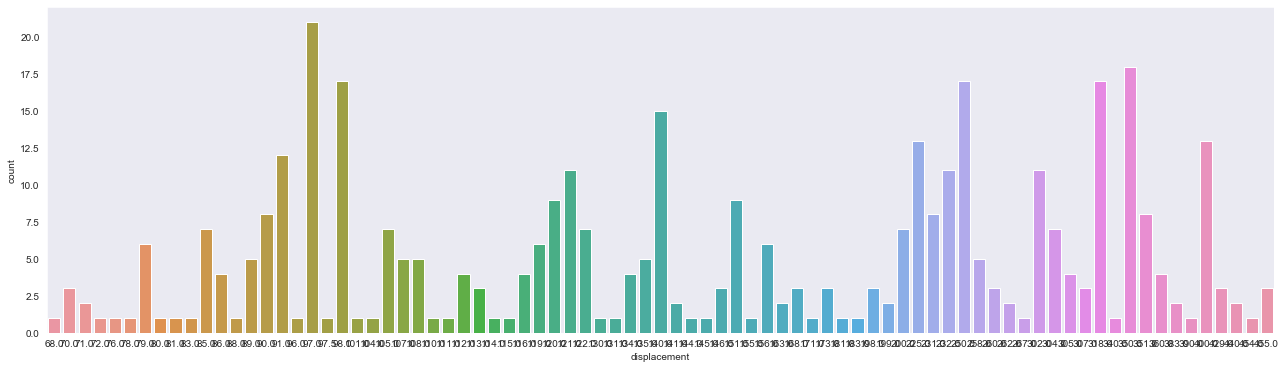

In [18]:
plt.figure(figsize=(22,6))
print(data['displacement'].value_counts())
sb.countplot(data['displacement'])      

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
94.0      1
167.0     1
158.0     1
137.0     1
107.0     1
Name: horsepower, Length: 93, dtype: int64


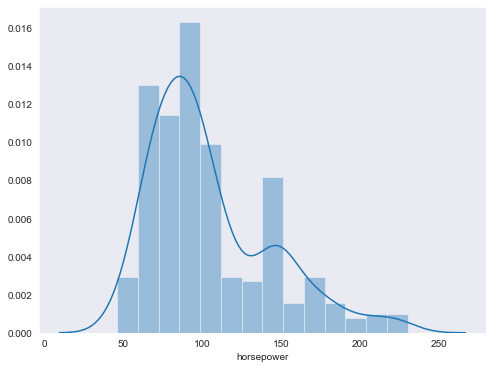

In [19]:
print(data['horsepower'].value_counts())
plt.figure(figsize=(8,6))
sb.set_style('dark')
sb.distplot(data['horsepower'])

1985    4
2130    4
2125    3
2945    3
2720    3
       ..
2370    1
3907    1
2372    1
4422    1
4096    1
Name: weight, Length: 346, dtype: int64


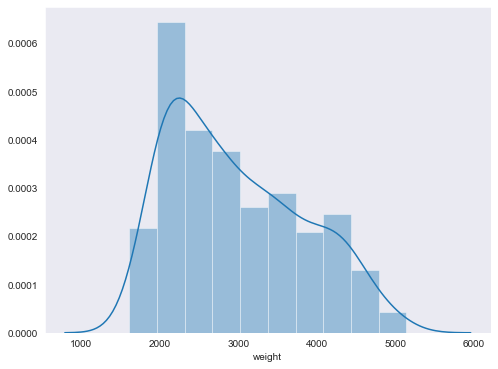

In [20]:
print(data['weight'].value_counts())
plt.figure(figsize=(8,6))
sb.set_style('dark')
sb.distplot(data['weight'])

14.5    23
15.5    21
16.0    16
14.0    16
13.5    15
        ..
17.1     1
24.6     1
23.5     1
16.1     1
15.6     1
Name: acceleration, Length: 95, dtype: int64


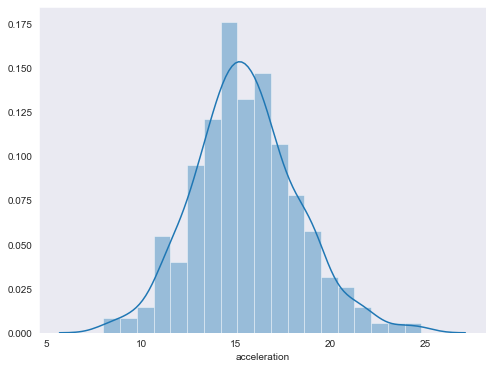

In [21]:
print(data['acceleration'].value_counts())
plt.figure(figsize=(8,6))
sb.set_style('dark')
sb.distplot(data['acceleration'])

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model year, dtype: int64


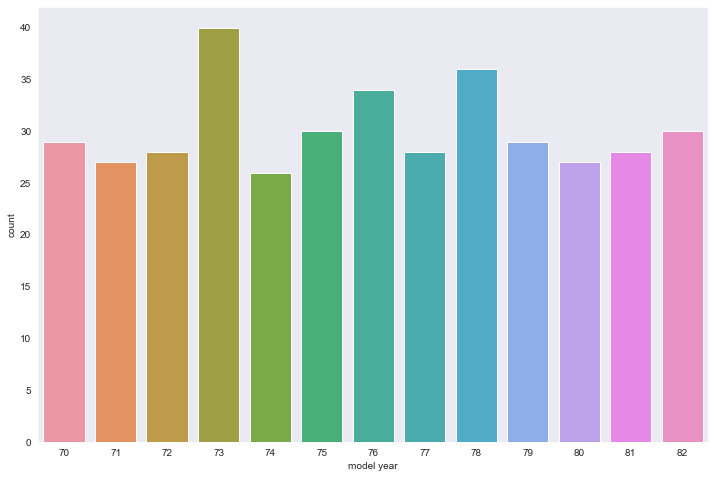

In [22]:
plt.figure(figsize=(12,8))
print(data['model year'].value_counts())
sb.countplot(data['model year'])

1    245
3     79
2     68
Name: origin, dtype: int64


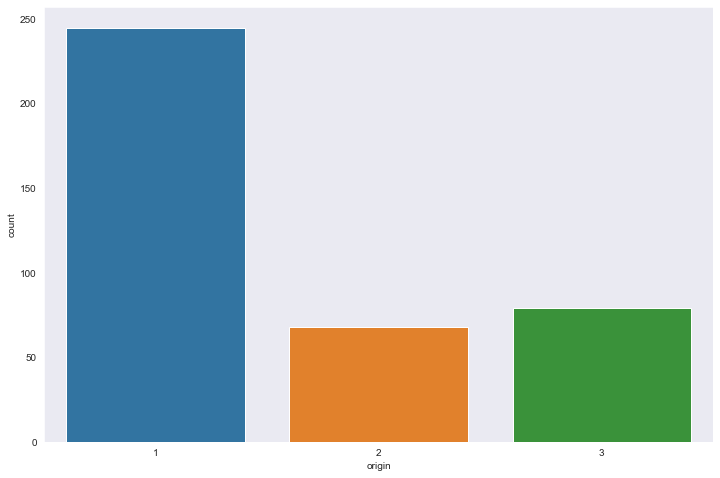

In [23]:
plt.figure(figsize=(12,8))
print(data['origin'].value_counts())
sb.countplot(data['origin'])

Bivariate plot

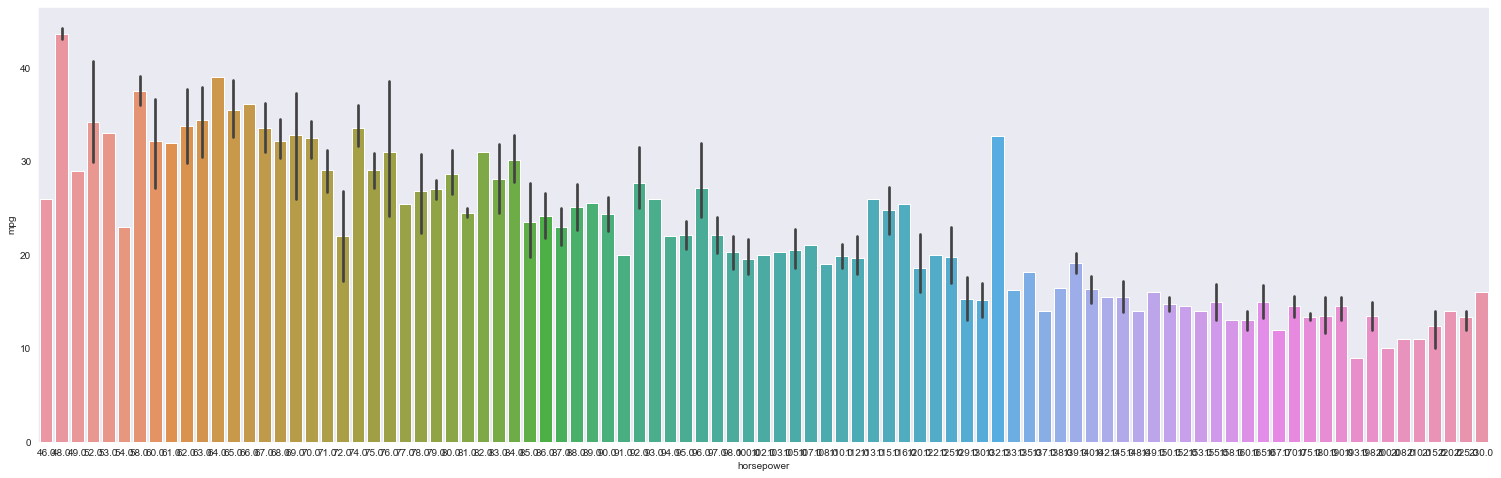

In [24]:
plt.figure(figsize=(26,8))
sb.barplot(x='horsepower',y='mpg',data=data)

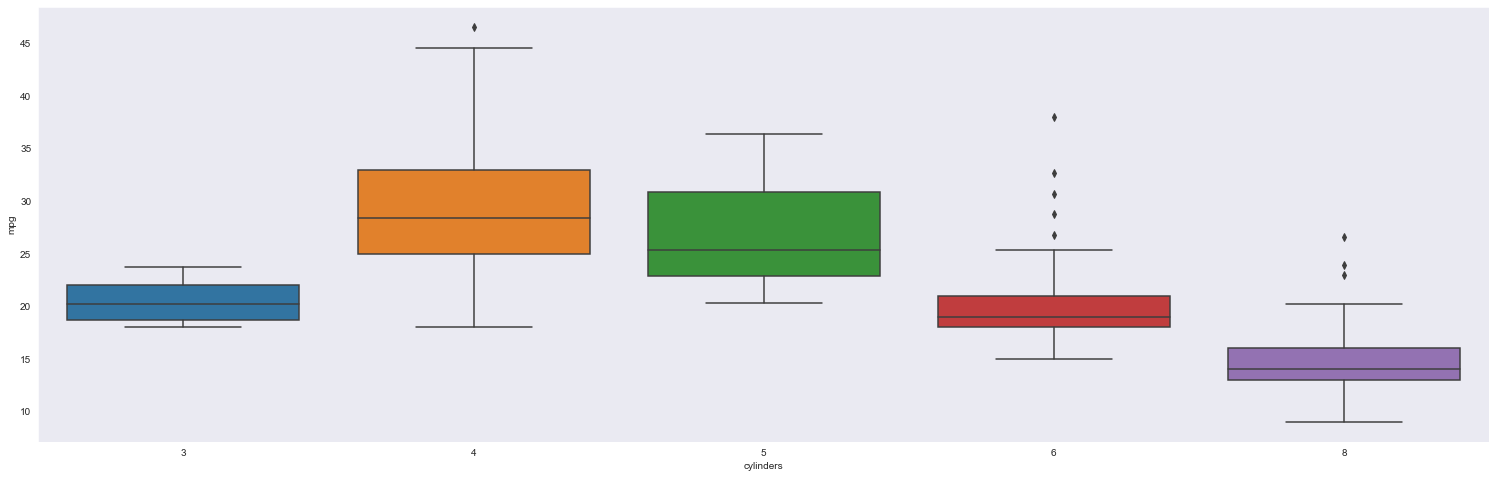

In [26]:
plt.figure(figsize=(26,8))
sb.boxplot(x='cylinders',y='mpg',data=data)

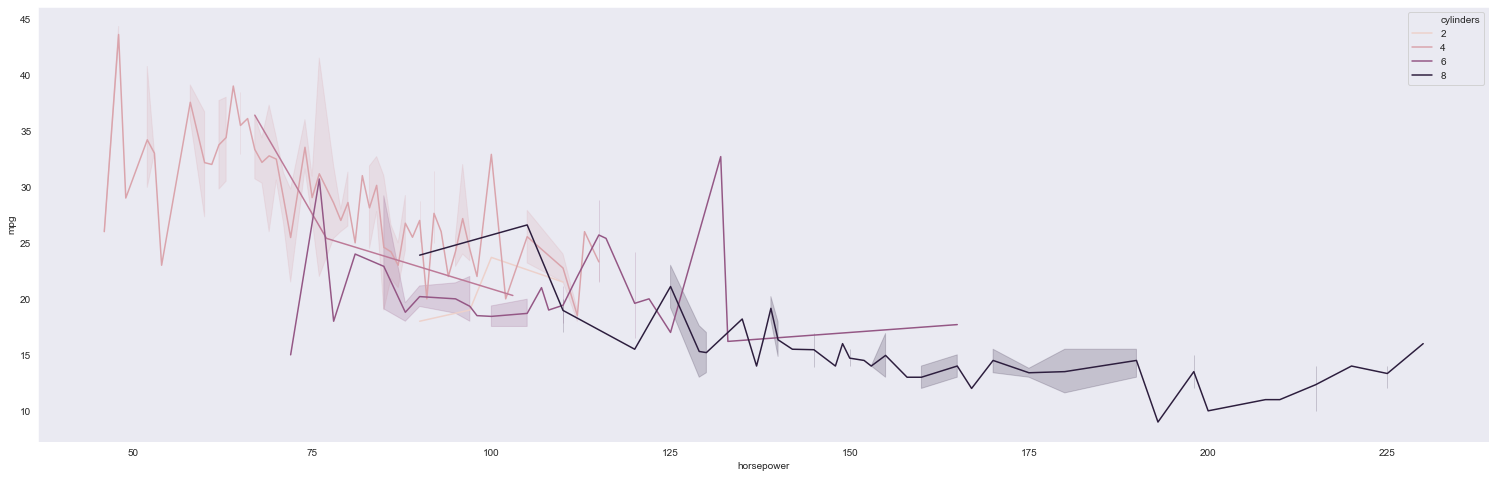

In [27]:
plt.figure(figsize=(26,8))
sb.lineplot(x='horsepower',y='mpg',hue='cylinders',data=data)

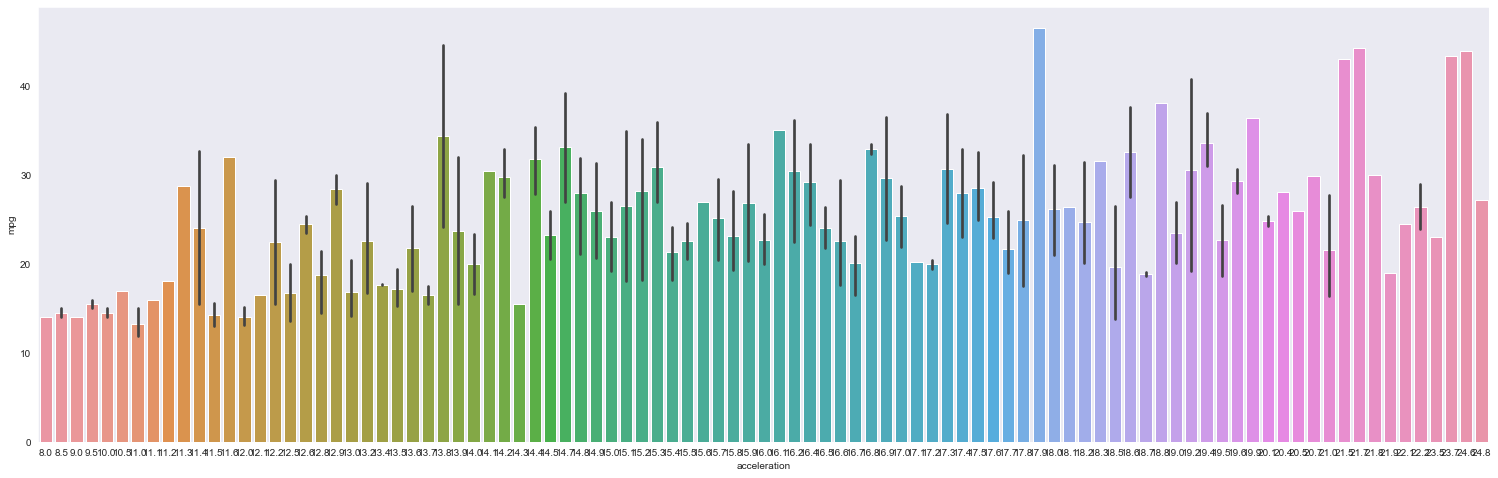

In [28]:
plt.figure(figsize=(26,8))
sb.barplot(x='acceleration',y='mpg',data=data)

Finding the skewness of the data 

In [25]:
data.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
dtype: float64

In [26]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [27]:
#skewness after treating the data
data.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.214231
horsepower      0.377557
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.790401
dtype: float64

In [28]:
# the Correlation between the different variables

data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.828442,-0.817346,-0.832244,0.423329,0.580541,0.572028
cylinders,-0.777618,1.000000,0.943036,0.843519,0.897527,-0.504683,-0.345647,-0.584121
displacement,-0.828442,0.943036,1.000000,0.872365,0.936354,-0.497364,-0.330076,-0.686974
horsepower,-0.817346,0.843519,0.872365,1.000000,0.876623,-0.698328,-0.397374,-0.496296
weight,-0.832244,0.897527,0.936354,0.876623,1.000000,-0.416839,-0.309120,-0.595269
acceleration,0.423329,-0.504683,-0.497364,-0.698328,-0.416839,1.000000,0.290316,0.224415
model year,0.580541,-0.345647,-0.330076,-0.397374,-0.309120,0.290316,1.000000,0.174626
origin,0.572028,-0.584121,-0.686974,-0.496296,-0.595269,0.224415,0.174626,1.000000


In [33]:
data.shape

(392, 8)

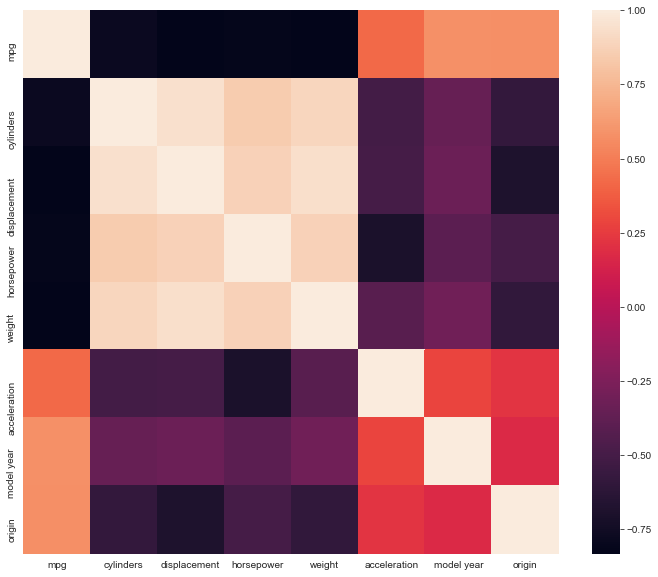

In [29]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(12,10))
sb.heatmap(data.corr())

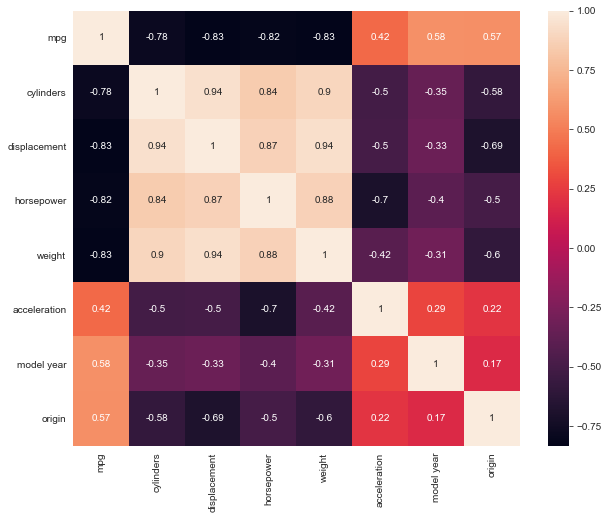

In [30]:
# This cluster shows the Correlation between the different variables

plt.figure(figsize=(10,8))
sb.heatmap(data.corr(),annot=True)

<Figure size 864x720 with 0 Axes>

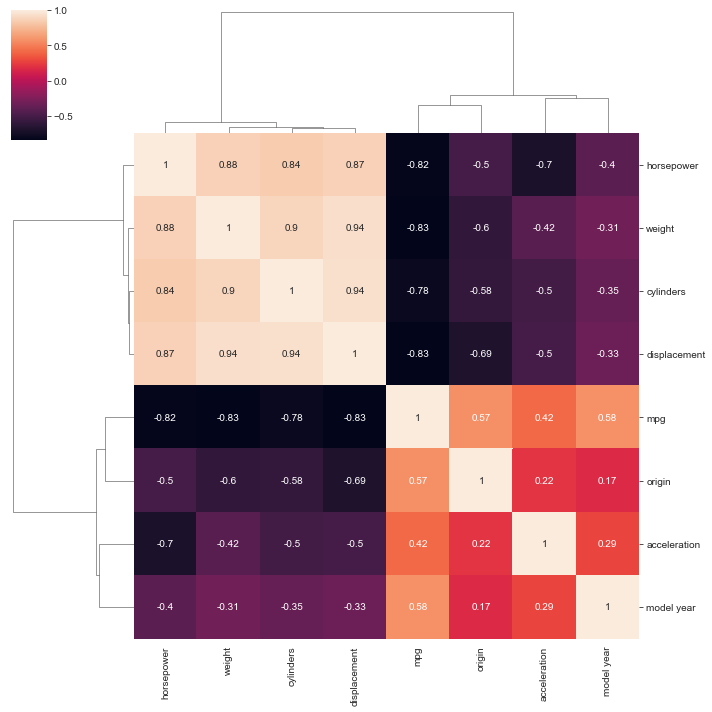

In [36]:
plt.figure(figsize=(12,10))
sb.clustermap(data.corr(),annot=True)

pairwise plot of relationship with the dataset

Multivariate plotting of dataset

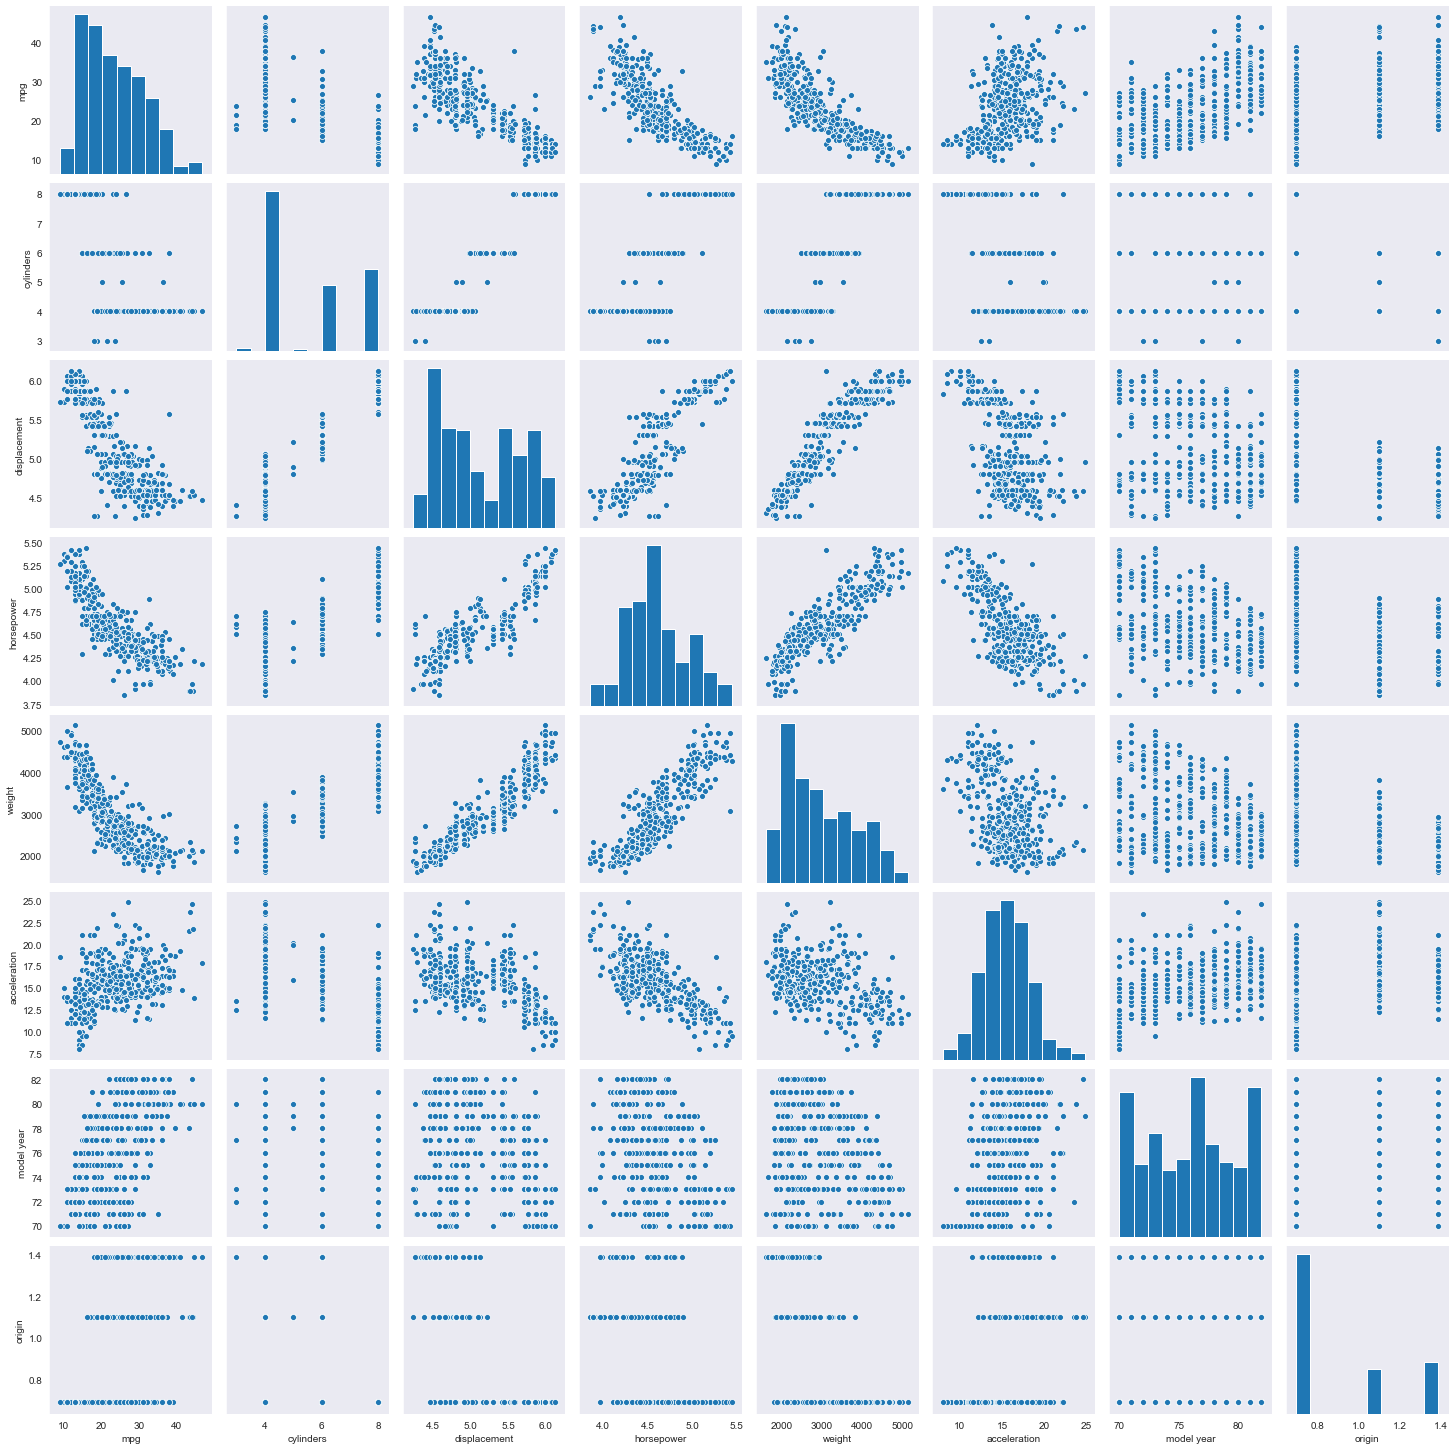

In [37]:
sb.pairplot(data)

# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [31]:
x=data.drop(['mpg'],axis=1)
y=data['mpg']

In [32]:
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,5.730100,4.875197,3504,12.0,70,0.693147
1,8,5.860786,5.111988,3693,11.5,70,0.693147
2,8,5.765191,5.017280,3436,11.0,70,0.693147
3,8,5.720312,5.017280,3433,12.0,70,0.693147
4,8,5.713733,4.948760,3449,10.5,70,0.693147
...,...,...,...,...,...,...,...
393,4,4.948760,4.465908,2790,15.6,82,0.693147
394,4,4.584967,3.970292,2130,24.6,82,1.098612
395,4,4.912655,4.442651,2295,11.6,82,0.693147
396,4,4.795791,4.382027,2625,18.6,82,0.693147


In [33]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [34]:
print(x.shape)
print(y.shape)

(392, 7)
(392,)


We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=300)

In [36]:
x=StandardScaler().fit_transform(x)

In [37]:
x

array([[ 1.48394702,  1.12602885,  0.81453267, ..., -1.285258  ,
        -1.62531533, -0.73689439],
       [ 1.48394702,  1.37315636,  1.51191473, ..., -1.46672362,
        -1.62531533, -0.73689439],
       [ 1.48394702,  1.19238639,  1.23298616, ..., -1.64818924,
        -1.62531533, -0.73689439],
       ...,
       [-0.86401356, -0.41975602, -0.45937786, ..., -1.4304305 ,
         1.63640964, -0.73689439],
       [-0.86401356, -0.640746  , -0.63792611, ...,  1.11008813,
         1.63640964, -0.73689439],
       [-0.86401356, -0.656439  , -0.52950365, ...,  1.40043312,
         1.63640964, -0.73689439]])

In [38]:
x_train.shape[0]==y_train.shape[0]

True

In [39]:
#working on LinearRegression 
#training and testing data using LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [40]:
#finding the r2 score of linearRegression

print(r2_score(y_test,pred))

0.8266356510195274


In [62]:
#cross valiadtion
score=cross_val_score(lr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(lr,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.5893867103747799
STD score: 0.22808041331910298

cross prediction [13.06954859  9.7035766  11.80136407 11.66597035 12.99491671  6.28760369
  5.19858742  5.86329483  4.46354717  8.50455414  9.65318785 11.63236259
 10.69357872  6.36522832 20.74130468 16.92552354 16.75689838 18.23802767
 22.90458662 27.42323599 19.8369973  21.09126407 19.60025196 19.01040727
 17.9363408   4.41751934  6.00932047  5.84926339  4.62255683 23.82778695
 19.57323392 22.24653271 17.68301588 15.2283611  15.35777373 16.78155494
 15.81040053  9.70518323  8.18521945 10.02383696 11.03218535  7.41064073
  7.91164101  7.03638977 15.4336286  20.46155446 15.61328195 17.3905669
 21.41822043 22.21500388 24.94146352 25.38818641 27.54486299 27.43200428
 26.05828287 23.10587747 22.53244884 23.30237648 25.82029536 18.78186064
 21.38911115 10.53606895  9.0318599  11.71123926 11.17130057 13.36169492
  6.80474302 10.32654077 10.04630842  7.89467917 24.74964226 12.67173014
 13.31730505 11.56489315 11.60485465 19.2055

In [63]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on linearRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE : 2.300685881701318
MSE : 10.57547579705197
RMSE : 3.251995663750487


In [66]:
#working on Ridge 
#training and testing data using Ridge

rg=Ridge()
rg.fit(x_train,y_train)
pred=rg.predict(x_test)
print(r2_score(y_test,pred))

0.8266691733936372


In [67]:
#cross valiadtion
score=cross_val_score(rg,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(rg,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.5917939366354718
STD score: 0.22712853599310745

cross prediction [13.06828767  9.77476683 11.84247263 11.71037418 12.99176731  6.3622185
  5.30123813  5.94746785  4.5802882   8.5778576   9.75168034 11.64004097
 10.7368872   6.65380657 20.8442253  16.97396853 16.8201431  18.2986316
 22.96414402 27.42185716 19.89073462 21.12819335 19.69966624 19.13889004
 17.9869989   4.49276807  6.06409669  5.90275947  4.6760223  23.88228367
 19.69517643 22.3465435  17.77238542 15.25955115 15.42102442 16.81312513
 15.85666319  9.71325772  8.20847758 10.04346428 11.01619184  7.36571923
  7.8988657   6.98105963 15.54693344 20.5609273  15.67439976 17.42672626
 21.46799002 22.30203853 24.94197306 25.36262366 27.54339758 27.45521689
 26.09992477 23.15249659 22.64547586 23.32186437 25.84768726 18.94557872
 21.47387264 10.53074113  9.06836013 11.69334461 11.180911   13.3571414
  6.86171595 10.29918246 10.03361958  7.95732201 24.74919558 12.65527249
 13.26235132 11.53299108 11.6025678  19.264413

In [68]:
print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE : 2.327858467602033
MSE : 10.573430883791874
RMSE : 3.2516812395731343


In [69]:
#working on Lasso 
#training and testing data using Lasso

la=Lasso()
la.fit(x_train,y_train)
pred=la.predict(x_test)
print(r2_score(y_test,pred))

0.8189485233732487


In [70]:
#cross valiadtion
score=cross_val_score(la,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(la,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.4765712036706903
STD score: 0.546060963360461

cross prediction [15.32506083 13.34120273 14.73747116 14.88734613 15.18104111 10.20447706
  9.51169629  9.8233283   9.22003952 11.95370705 13.25420377 13.78845039
 13.17869075 12.65630163 23.06718311 19.85489996 19.8959674  20.95847966
 24.51418171 28.08666894 22.6707025  23.22496452 23.21030456 22.3094588
 20.55883427  9.67986412 11.12594657 10.7769416  10.40574931 25.08321201
 23.22070547 24.00575915 20.20232179 18.01172814 18.18300792 18.83176554
 18.52396823 12.58602747 11.24173783 13.06192295 13.61275016  9.99058472
 10.65008053  9.50692589 18.59291747 23.86088897 18.30362354 19.25007079
 23.97222656 24.32827337 26.79531171 26.10900819 28.34580384 28.4431447
 27.46378799 26.50331597 24.44647496 25.8135594  27.42933236 23.42019004
 24.52585913 12.98824893 12.01350503 14.08169516 13.6951105  15.41206347
 10.3685602  12.68778211 12.66129746 11.54384652 25.71865369 14.8474797
 14.93874527 14.15058679 14.23053997 21.69404736

In [71]:
print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE : 2.5228615842842244
MSE : 11.044401691275041
RMSE : 3.3233118558562995


In [51]:
#working on DecisionTreeRegressor 
#training and testing data using DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [52]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on linearRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE : 2.608474576271187
MSE : 14.197966101694917
RMSE : 3.76801885633484


In [86]:
#working on RandomForestRegressor 
#training and testing data using RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [87]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on linearRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE : 1.830703389830509
MSE : 8.279875754237285
RMSE : 2.8774773247129652


GridSearchCV for the best model

In [91]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
rgscv = GridSearchCV(estimator=rg, param_grid=param_grid,cv=10)
grid = rgscv.fit(x_train,y_train)
print(rgscv)
print('best score :',grid.best_score_)
print('best params :',grid.best_params_)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
best score : 0.7980031708722782
best params : {'alpha': 0.1}


In [92]:
# Save the best model with the help of joblib and pickle

joblib.dump(rg,'auto.pkl')

['auto.pkl']

# Conclusion

Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Electronic design automation and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib